### Homework: Implement possibilistic k-means

Goal:
1. Implement the mahalanobis_distance function.
2. Implement the calculate_eta function.
3. Implement the calculate_u.

Hint: the assignation matrix should not be set to zeros at the beginning.

**Deadline:** 4.04.2018


In [316]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
from scipy.spatial.distance import cdist

In [54]:
error_margin = 1e-6

In [217]:
clusters = 3

In [330]:
x, true_assignation = ds.make_blobs(100, 2, clusters)
# x

In [331]:
x_norm = (x - np.min(x, axis=0)) / (np.max(x, axis=0) - np.min(x, axis=0))
# x_norm

In [332]:
def mahalanobis_distance_2(u, v, VI):
    return np.matmul(np.matmul((u - v), VI), (u - v).T)

# def mahalanobis_distance(u, v, VI):
#     return np.sqrt(mahalanobis_distance_2(u, v, VI))

In [333]:
def calculate_eta(u, D2, m):
    u_m = np.power(u, m)
    return np.sum(u_m * D2, axis=0) / np.sum(u_m, axis=0)

In [436]:
def calculate_D2(x, v, A):
    D2 = cdist(x, v, metric='euclidean')
    D2 = np.fmax(D2, np.finfo(x.dtype).eps)
    return D2
    D2 = np.zeros([v.shape[0], x.shape[0]])
    for k, x_k in enumerate(x):
        for i, v_i in enumerate(v):
#             D2[i,k] = np.sum(np.square(x_k - v_i))
            D2[i,k] = mahalanobis_distance_2(x_k, v_i, A)
    D2 = np.fmax(D2, np.finfo(x.dtype).eps)
    return D2.T

In [437]:
def calculate_u(u, x, v, D2, m):
    eta = calculate_eta(u, D2, m) #+ 1e-10
    eta2 = np.square(eta)# + 1e-10
    
#     A = np.linalg.inv(np.cov(x.T))
    A = np.eye(x.shape[1])
    D2 = calculate_D2(x, v, A)
#     print('D2', D2.shape)
#     print('eta', eta.shape)
    u_new = 1.0 / (1.0 + np.power(D2 / eta, 1.0 / (m - 1)))
    return u_new, D2

In [481]:
def calculate_new_centers(u, x, m):
#     v = np.zeros([u.shape[1], x.shape[1]])
#     for i in range(v.shape[0]):
#         for j in range(v.shape[1]):
#             v[i,j] = np.sum((u[:, i] ** m) * x[:, j]) / np.sum(u[:, i] ** m)
#     return v
    
#     um = u ** m
#     v = um.T.dot(x) / np.atleast_2d(um.sum(axis=0)).T
#     return v
    
    um = np.power(u, m)
    return np.dot(um.T, x) / np.atleast_2d(np.sum(um, axis=0)).T
    return (np.matmul(um.T, x).T / np.sum(um, axis=0)).T

In [460]:
u = np.random.uniform(size=assignation.shape)
u.shape

(100, 3)

In [488]:
xx = np.array([[2, 3], [0, 0], [0, 1], [1, 3]])
uu = np.array([[1, 0], [0.0, 1], [0, 1], [1, 0]])

calculate_new_centers(uu, xx, 2)


array([[1.5, 3. ],
       [0. , 0.5]])

In [489]:
xx = np.array([[2, 3], [0, 0], [0, 1], [1, 3]])
uu = np.array([[1, 0], [0.1, .9], [0, 1], [1, 0]])

calculate_new_centers(uu, xx, 2)


array([[1.49253731, 2.98507463],
       [0.        , 0.55248619]])

In [480]:
calculate_new_centers(u, x_norm, 3)

array([[0.34355803, 0.45622257],
       [0.43859243, 0.48023623],
       [0.37734487, 0.50266702]])

In [462]:
assignation.shape

(100, 3)

In [463]:
x_norm.shape

(100, 2)

In [464]:
um = u ** 3

In [465]:
np.sum(um[:,1] * x_norm[:, 0])

10.144248632004262

In [466]:
np.sum(um, axis=0)

array([27.12458951, 23.12910099, 26.53599145])

In [467]:
np.sum(um[:,0] * x_norm[:, 0]) / np.sum(um[:, 0])

0.34355803454568473

In [468]:
def calculate_differences(assignation, new_assignation):
    return np.sum(np.abs(np.subtract(assignation, new_assignation)))

In [469]:
def possibilistic_k_means(x, clusters=3, m=2):
    u = np.random.normal(size=[x.shape[0], clusters])
    v = calculate_new_centers(u, x, m)
    D2 = calculate_D2(x, v, np.eye(2))
    
    error = error_margin + 1.0
    while error >= 1e-4: # error_margin:
        new_u, D2 = calculate_u(u, x, v, D2, m)
        error = calculate_differences(u, new_u)
        print(error)
        v = calculate_new_centers(new_u, x, m)
        u = new_u
#         break

    return v, u

In [473]:
centers, assignation = possibilistic_k_means(x_norm, clusters=clusters, m=3)

print(centers)
# print(assignation)
np.argmax(assignation, axis=1)

255.3728769090694
4.195801624929792
1.5584350132688605
0.5835215541489328
0.21861443625658572
0.08180449854194288
0.03063015644699718
0.011488041417684114
0.004318069222658372
0.0016269393055757253
0.0006145017020248722
0.0002327108946984513
8.837874955225367e-05
[[0.44378921 0.49857587]
 [0.44378899 0.49857501]
 [0.44378873 0.49857485]]


array([1, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 2, 0, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 1, 1, 2,
       0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 1, 0, 1, 2, 0, 2, 0, 1, 2, 0,
       0, 1, 1, 1, 0, 2, 1, 2, 0, 2, 0, 2])

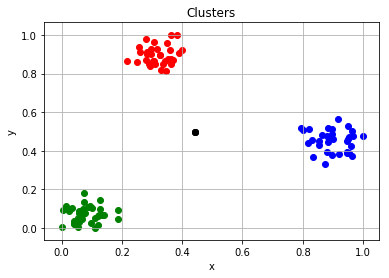

In [474]:
a = np.argmax(assignation, axis=1)

sets = [x_norm[np.where(a == i)] for i in range(len(centers))]
colors = ['red', 'blue', 'green', 'yellow']

fig, ax = plt.subplots()

for points, color in zip(sets, colors):
    ax.scatter(points[:, 0], points[:, 1], c=color)

ax.scatter(np.array(centers)[:, 0], np.array(centers)[:, 1], c='black')
ax.set(xlabel='x', ylabel='y', title='Clusters')
ax.grid()
plt.show()